## Factor Analysis 

In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from factor_analyzer import FactorAnalyzer 
from factor_analyzer.factor_analyzer import calculate_kmo

In [58]:
df = pd.read_csv ("data_responden_terbaru.csv", delimiter = ";")
df.head()

,M_1,M_2,M_3,M_4,M_5,SUM_M,G_1,G_2,G_3,G_4,...,K_8,K_9,K_10,SUM_K,P_1,P_2,P_3,P_4,P_5,SUM_P
0,2,1,1,2,4,10,2,2,2,3,...,4,3,3,35,2,3,3,2,4,14
1,2,3,3,3,3,14,3,3,3,4,...,3,3,3,31,2,3,2,3,3,13
2,2,2,2,3,3,12,2,2,2,2,...,3,3,2,33,2,3,3,3,3,14
3,2,2,1,3,3,11,2,2,2,3,...,4,2,2,27,2,3,3,3,3,14
4,2,2,2,3,4,13,3,4,3,3,...,4,2,3,34,2,2,2,3,4,13


In [59]:
df.drop (["M_1", "M_2", "M_3", "M_4", "M_5", "SUM_M", "SUM_G","K_8", "K_9", "SUM_K", "SUM_P"], axis = 1, inplace = True)

In [60]:
df.head()

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,K_1,K_2,K_3,K_4,K_5,K_6,K_7,K_10,P_1,P_2,P_3,P_4,P_5
0,2,2,2,3,4,2,3,4,3,3,4,4,4,3,3,2,3,3,2,4
1,3,3,3,4,4,2,3,3,2,3,3,3,4,4,3,2,3,2,3,3
2,2,2,2,2,2,2,2,1,4,4,4,4,4,4,2,2,3,3,3,3
3,2,2,2,3,3,2,2,3,3,3,3,2,2,3,2,2,3,3,3,3
4,3,4,3,3,4,3,4,3,4,3,4,4,3,4,3,2,2,2,3,4


In [61]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G_1     59 non-null     int64
 1   G_2     59 non-null     int64
 2   G_3     59 non-null     int64
 3   G_4     59 non-null     int64
 4   G_5     59 non-null     int64
 5   G_6     59 non-null     int64
 6   G_7     59 non-null     int64
 7   K_1     59 non-null     int64
 8   K_2     59 non-null     int64
 9   K_3     59 non-null     int64
 10  K_4     59 non-null     int64
 11  K_5     59 non-null     int64
 12  K_6     59 non-null     int64
 13  K_7     59 non-null     int64
 14  K_10    59 non-null     int64
 15  P_1     59 non-null     int64
 16  P_2     59 non-null     int64
 17  P_3     59 non-null     int64
 18  P_4     59 non-null     int64
 19  P_5     59 non-null     int64
dtypes: int64(20)
memory usage: 9.3 KB


In [62]:
df.shape

(59, 20)

In [63]:
df.isnull().sum()

G_1     0
G_2     0
G_3     0
G_4     0
G_5     0
G_6     0
G_7     0
K_1     0
K_2     0
K_3     0
K_4     0
K_5     0
K_6     0
K_7     0
K_10    0
P_1     0
P_2     0
P_3     0
P_4     0
P_5     0
dtype: int64

In [64]:
df.corr()

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,K_1,K_2,K_3,K_4,K_5,K_6,K_7,K_10,P_1,P_2,P_3,P_4,P_5
G_1,1.000000,0.461298,0.427208,0.459678,0.317433,0.266403,0.077932,-0.023262,-0.000596,-0.100058,-0.122554,-0.158566,-0.089956,-0.038846,0.017516,0.057565,-0.073690,0.096768,0.121058,0.048408
G_2,0.461298,1.000000,0.413828,0.419334,0.270970,0.281839,0.143673,0.058383,0.050146,0.102881,0.130479,0.119142,0.030143,0.009526,-0.008640,0.019198,0.170380,-0.077065,0.205643,-0.136382
G_3,0.427208,0.413828,1.000000,0.378599,0.377916,-0.035101,0.370216,-0.012004,-0.091017,0.127573,0.035821,0.093443,0.174735,0.123320,0.085228,0.093443,0.068814,0.190241,0.156985,-0.220670
G_4,0.459678,0.419334,0.378599,1.000000,0.302556,0.172253,0.071934,-0.035241,-0.138791,-0.167442,-0.141845,-0.090924,0.005334,-0.197221,-0.091729,0.085929,-0.068673,-0.039591,0.015409,-0.198327
G_5,0.317433,0.270970,0.377916,0.302556,1.000000,0.011219,0.106592,0.163450,-0.009229,-0.043762,0.050959,-0.096734,0.070392,0.043762,-0.033592,-0.064849,0.141323,0.060076,0.173093,0.094423
G_6,0.266403,0.281839,-0.035101,0.172253,0.011219,1.000000,0.116782,-0.187599,0.059022,-0.070878,0.084260,-0.005082,0.010852,-0.030295,-0.071930,0.054888,-0.206739,-0.179560,-0.075362,-0.056805
G_7,0.077932,0.143673,0.370216,0.071934,0.106592,0.116782,1.000000,-0.110001,-0.159327,0.033101,0.024167,0.191023,0.081817,0.077444,0.109394,0.059972,-0.116049,-0.124073,-0.082344,-0.104159
K_1,-0.023262,0.058383,-0.012004,-0.035241,0.163450,-0.187599,-0.110001,1.000000,0.480105,0.471196,0.320804,0.355837,0.336929,0.467525,0.161299,0.099025,0.218293,0.078451,0.211709,0.257239
K_2,-0.000596,0.050146,-0.091017,-0.138791,-0.009229,0.059022,-0.159327,0.480105,1.000000,0.529961,0.501555,0.444916,0.463388,0.533566,0.191280,0.142322,0.201324,0.082558,0.270745,0.298155
K_3,-0.100058,0.102881,0.127573,-0.167442,-0.043762,-0.070878,0.033101,0.471196,0.529961,1.000000,0.635876,0.585150,0.625424,0.638889,0.213780,0.024698,0.236381,0.046004,0.211102,0.050443


In [65]:
# memeriksa multikolinieritas
df.corr()[(df.corr()> 0.9)
         & (df.corr()<1)]

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,K_1,K_2,K_3,K_4,K_5,K_6,K_7,K_10,P_1,P_2,P_3,P_4,P_5
G_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# pengujian kmo. nilai kmo kurang dari 0.6 sehingga tidak sesuai dilakukan analisis faktor 
kmo_all, kmo_model = calculate_kmo (df)
kmo_model

C:\Users\vannesa\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6566662637863044

In [67]:
#menentukan jumlah vaktor yang sesuai 

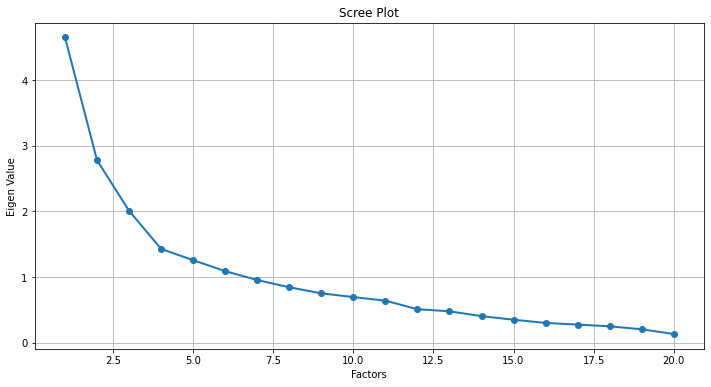

In [68]:
fa = FactorAnalyzer (rotation = "varimax", n_factors = df.shape [1])
fa.fit (df)
ev,_ = fa.get_eigenvalues ()
factor_values = np.arange (df.shape[1]) + 1
plt.figure (figsize = (12,6))
plt.plot (factor_values, ev, 'o-', linewidth = 2)
plt.title ("Scree Plot")
plt.xlabel ("Factors")
plt.ylabel ("Eigen Value")
plt.grid()

In [69]:
print ("Titik yang sebelum konstan adalah faktor ke-6")

Titik yang sebelum konstan adalah faktor ke-6


In [74]:
# analisis faktor 
fa = FactorAnalyzer (n_factors = 5, rotation = "varimax")
fa.fit (df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [75]:
output = pd.DataFrame (fa.loadings_, index = df.columns)
output

,0,1,2,3,4
G_1,-0.102113,0.728811,0.005182,0.028635,-0.010772
G_2,0.120872,0.662670,-0.062813,0.068154,0.104040
G_3,0.113438,0.564276,0.341255,-0.082992,0.691011
G_4,-0.147073,0.591233,-0.062382,0.035160,0.166576
G_5,0.021439,0.475453,0.229745,-0.172188,0.025606
G_6,0.019293,0.342620,-0.485701,0.193917,-0.068385
G_7,0.089820,0.129375,-0.109439,0.031549,0.438003
K_1,0.508519,0.039062,0.228769,-0.023176,-0.207808
K_2,0.656534,0.041659,0.054145,0.122421,-0.348375
K_3,0.814502,-0.055937,0.083514,-0.003569,0.064073


In [76]:
output.where (abs(output)>0.5)

,0,1,2,3,4
G_1,NaN,0.728811,NaN,NaN,NaN
G_2,NaN,0.662670,NaN,NaN,NaN
G_3,NaN,0.564276,NaN,NaN,0.691011
G_4,NaN,0.591233,NaN,NaN,NaN
G_5,NaN,NaN,NaN,NaN,NaN
G_6,NaN,NaN,NaN,NaN,NaN
G_7,NaN,NaN,NaN,NaN,NaN
K_1,0.508519,NaN,NaN,NaN,NaN
K_2,0.656534,NaN,NaN,NaN,NaN
K_3,0.814502,NaN,NaN,NaN,NaN


In [73]:
pd.DataFrame (fa.get_communalities(), 
             index = df.columns,
             columns = ["Communalities"])

,Communalities
G_1,0.545459
G_2,0.490099
G_3,0.809840
G_4,0.422167
G_5,0.312062
G_6,0.427527
G_7,0.459792
K_1,0.358864
K_2,0.574663
K_3,0.735369
